In [599]:
import os, sys

PRJ_ROOT = os.environ['PRJ_ROOT']
if f"{PRJ_ROOT}/src" not in sys.path:
    sys.path.append(f"{PRJ_ROOT}/src")

%reload_ext autoreload
%autoreload 2

THIS_DIR = f"{PRJ_ROOT}/notebooks"
os.chdir(THIS_DIR)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [600]:
from moke_config import create_config
from youtube_stat.lib.file_util import load_yaml_from_file
from youtube_stat.config import Config
from youtube_stat.lib.file_util import load_json_from_file, save_json_to_file

config_dict = load_yaml_from_file(f"{PRJ_ROOT}/config/siro.yml")
config = create_config(Config, config_dict)


In [601]:
from youtube_stat.data.processor import DataProcessor
dp = DataProcessor(config)
df = dp.load_training_data()

In [602]:
words = load_json_from_file(dp.word_index_path)
for w, i in list(words.items()):
    words[f"w{i:03d}"] = w


In [603]:
df.describe()

,view,like,dislike,comment,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,...,w155,w156,w157,w158,w159,w160,w161,w162,w163,w164
count,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,...,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000,386.000000
mean,134907.075130,3778.709845,74.567358,622.829016,0.002591,0.002591,0.049223,0.064767,0.067358,0.056995,...,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772,0.007772
std,113662.841271,2575.377325,76.894172,487.825072,0.050899,0.050899,0.216614,0.246433,0.250965,0.232134,...,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930,0.087930
min,13897.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67858.500000,2131.250000,31.000000,193.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,100994.500000,3491.500000,49.500000,579.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,162861.750000,4692.500000,86.250000,856.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,977923.000000,19829.000000,557.000000,2405.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


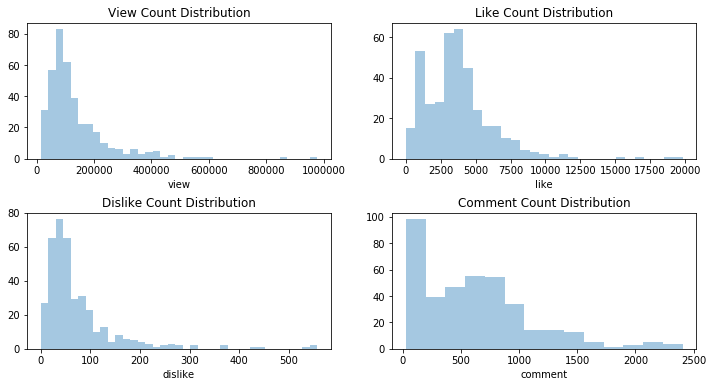

In [635]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))

sns.distplot(df.view, kde=False, ax=axes[0, 0])
axes[0, 0].set_title("View Count Distribution")

sns.distplot(df.like, kde=False, ax=axes[0, 1])
axes[0, 1].set_title("Like Count Distribution")

sns.distplot(df.dislike, kde=False, ax=axes[1, 0])
axes[1, 0].set_title("Dislike Count Distribution")

sns.distplot(df.comment, kde=False, ax=axes[1, 1])
axes[1, 1].set_title("Comment Count Distribution")

plt.subplots_adjust(hspace=0.4)

In [ ]:
fig.savefig

Text(0.5,1,'Like/View Rate Distribution')

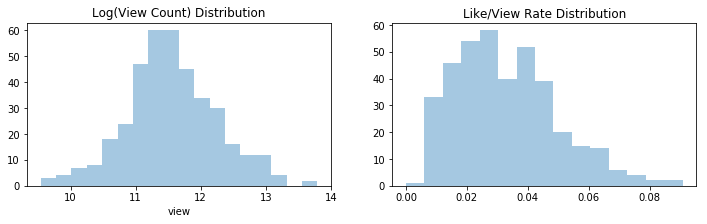

In [638]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,3))

sns.distplot(np.log(df.view), kde=False, ax=axes[0])
axes[0].set_title("Log(View Count) Distribution")

sns.distplot(df.like/df.view, kde=False, ax=axes[1])
axes[1].set_title("Like/View Rate Distribution")

In [606]:
import re
import statsmodels.formula.api as smf
import statsmodels.api as sm


x_cols = [x for x in df.columns if re.search(r"^(201|Mon|Tue|Wed|Thr|Fri|Sat|Sun|w)", x)]

df_x = df.loc[:, x_cols]
df_x = sm.add_constant(df_x, prepend=False)

df_y = np.log(df.view)
#df_y = df.view

model = smf.OLS(df_y, df_x, hasconst=True)
result = model.fit()
s = result.summary2()
s

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
==================================================================
Model:              OLS              Adj. R-squared:     0.459    
Dependent Variable: view             AIC:                699.5896 
Date:               2018-09-05 12:57 BIC:                1395.8169
No. Observations:   386              Log-Likelihood:     -173.79  
Df Model:           175              F-statistic:        2.864    
Df Residuals:       210              Prob (F-statistic): 2.66e-13 
R-squared:          0.705            Scale:              0.26483  
--------------------------------------------------------------------
           Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
2017-06    0.3377     0.6004     0.5625   0.5744   -0.8458    1.5212
2017-07   -0.0902     0.5969    -0.1511   0.8801   -1.2669    1.0865
2017-08    0.6451     0.1499     4.3030   0.0000    0.3496    0.9406
2017-09   -0.0146     0.1567    -0.0933   0.9258   -0.3236    0.2944
2017-10    0.5402     0.1389     3.8890   0.0001    0.2664    0.8141
2017-11    0.0868     0.1584     0.5481   0.5842   -0.2255    0.3991
2017-12    1.0587     0.1607     6.5881   0.0000    0.7419    1.3755
2018-01    1.5369     0.1389    11.0616   0.0000    1.2630    1.8108
2018-02    1.4335     0.1335    10.7389   0.0000    1.1704    1.6967
2018-03    0.9489     0.1313     7.2251   0.0000    0.6900    1.2078
2018-04    0.8501     0.1508     5.6375   0.0000    0.5528    1.1474
2018-05    0.6544     0.1507     4.3416   0.0000    0.3573    0.9515
2018-06    0.6040     0.1537     3.9310   0.0001    0.3011    0.9069
2018-07    0.5572     0.1422     3.9192   0.0001    0.2769    0.8375
2018-08    0.2984     0.1504     1.9848   0.0485    0.0020    0.5948
Mon        1.3978     0.0918    15.2201   0.0000    1.2167    1.5788
Tue        1.2727     0.0858    14.8333   0.0000    1.1036    1.4419
Wed        1.2728     0.0860    14.7944   0.0000    1.1032    1.4424
Thr        1.2231     0.0862    14.1806   0.0000    1.0530    1.3931
Fri        1.3422     0.0855    15.7039   0.0000    1.1737    1.5107
Sat        1.4931     0.0833    17.9289   0.0000    1.3289    1.6573
Sun        1.4456     0.0907    15.9363   0.0000    1.2667    1.6244
w000       0.1062     0.0851     1.2486   0.2132   -0.0615    0.2740
w001       0.1453     0.1195     1.2161   0.2253   -0.0902    0.3809
w002      -0.1294     0.1446    -0.8953   0.3717   -0.4145    0.1556
w003      -0.2270     0.1629    -1.3937   0.1649   -0.5481    0.0941
w004      -0.3018     0.6932    -0.4354   0.6637   -1.6683    1.0647
w005      -0.3321     0.2000    -1.6599   0.0984   -0.7264    0.0623
w006       0.4456     0.7156     0.6227   0.5342   -0.9652    1.8564
w007       0.2878     0.2325     1.2379   0.2171   -0.1705    0.7461
w008       0.3943     0.2453     1.6075   0.1095   -0.0893    0.8778
w009      -0.0155     0.3181    -0.0488   0.9611   -0.6427    0.6116
w010      -0.2405     0.2172    -1.1071   0.2695   -0.6688    0.1877
w011      -0.0618     0.1262    -0.4898   0.6248   -0.3107    0.1870
w012      -0.0618     0.1262    -0.4898   0.6248   -0.3107    0.1870
w013      -0.0618     0.1262    -0.4898   0.6248   -0.3107    0.1870
w014       0.3594     0.2026     1.7738   0.0775   -0.0400    0.7587
w015      -0.2184     0.2450    -0.8912   0.3738   -0.7014    0.2647
w016       0.2802     0.1934     1.4486   0.1489   -0.1011    0.6614
w017       0.2761     0.2182     1.2657   0.2070   -0.1539    0.7062
w018       0.0493     0.2395     0.2058   0.8372   -0.4229    0.5215
w019      -0.1280     0.2159    -0.5932   0.5537   -0.5536    0.2975
w020      -0.1713     0.4874    -0.3515   0.7256   -1.1322    0.7895
w021       0.0004     0.2344     0.0016   0.9987   -0.4616    0.4624
w022      -0.5463     0.2430    -2.2480   0.0256   -1.0253   -0.0672
w023       0.3292     0.2650     1.2423   0.2155   -0.

In [607]:
coef = s.tables[1]
cf = coef[coef['P>|t|'] < 0.1].loc[:, "Coef."]

wdf = {}
ddf = {}
for k, v in dict(cf).items():
    if k in words:
        wdf[words[k]] = v
    else:
        ddf[k] = v
pd.DataFrame(list(sorted([[k, v] for k, v in wdf.items()], key=lambda x: x[1])))

,0,1
0,動物,-1.000030
1,空間,-0.948933
2,運動会,-0.946839
3,制作,-0.924531
4,みんな,-0.819723
5,悩む,-0.799700
6,モノマネ,-0.751134
7,台詞,-0.741718
8,ボイス,-0.714967
9,誕生,-0.680925


In [608]:
[x for x in list(bdf.title) if "本気" in x]

['【声真似】バーチャルYouTuberのモノマネに挑戦してみた【本気】',
 '【踊ってみた】好き！雪！本気マジック【電脳少女シロ】',
 "【神回】PUBGで女子が本気出したら奇跡が起きた！なんと‥！【PLAYERUNKNOWN'S BATTLEGROUNDS】"]

In [609]:
import re
import statsmodels.formula.api as smf


x_cols = [x for x in df.columns if re.search(r"^(201|Mon|Tue|Wed|Thr|Fri|Sat|Sun|w)", x)]

df_x = df.loc[:, x_cols]
df_x = sm.add_constant(df_x, prepend=False)
df_y = df.like / df.view

model = smf.OLS(df_y, df_x, hasconst=True)
result = model.fit()
s = result.summary2()
s

<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Results: Ordinary least squares
===================================================================
Model:              OLS              Adj. R-squared:     0.749     
Dependent Variable: y                AIC:                -2484.6014
Date:               2018-09-05 12:57 BIC:                -1788.3740
No. Observations:   386              Log-Likelihood:     1418.3    
Df Model:           175              F-statistic:        7.563     
Df Residuals:       210              Prob (F-statistic): 7.69e-41  
R-squared:          0.863            Scale:              6.9245e-05
---------------------------------------------------------------------
             Coef.    Std.Err.      t      P>|t|     [0.025    0.975]
---------------------------------------------------------------------
2017-06     -0.0258     0.0097   -2.6627   0.0084   -0.0450   -0.0067
2017-07     -0.0100     0.0097   -1.0346   0.3021   -0.0290    0.0090
2017-08     -0.0106     0.0024   -4.3842   0.0000   -0.0154   -0.0058
2017-09     -0.0076     0.0025   -2.9960   0.0031   -0.0126   -0.0026
2017-10     -0.0106     0.0022   -4.7388   0.0000   -0.0151   -0.0062
2017-11     -0.0065     0.0026   -2.5339   0.0120   -0.0115   -0.0014
2017-12     -0.0107     0.0026   -4.1213   0.0001   -0.0158   -0.0056
2018-01     -0.0012     0.0022   -0.5523   0.5813   -0.0057    0.0032
2018-02      0.0000     0.0022    0.0037   0.9971   -0.0042    0.0043
2018-03      0.0069     0.0021    3.2595   0.0013    0.0027    0.0111
2018-04      0.0094     0.0024    3.8433   0.0002    0.0046    0.0142
2018-05      0.0172     0.0024    7.0542   0.0000    0.0124    0.0220
2018-06      0.0207     0.0025    8.3211   0.0000    0.0158    0.0256
2018-07      0.0241     0.0023   10.4750   0.0000    0.0196    0.0286
2018-08      0.0286     0.0024   11.7676   0.0000    0.0238    0.0334
Mon          0.0028     0.0015    1.9022   0.0585   -0.0001    0.0058
Tue          0.0046     0.0014    3.3277   0.0010    0.0019    0.0074
Wed          0.0048     0.0014    3.4277   0.0007    0.0020    0.0075
Thr          0.0049     0.0014    3.5175   0.0005    0.0022    0.0077
Fri          0.0052     0.0014    3.7728   0.0002    0.0025    0.0079
Sat          0.0020     0.0013    1.5150   0.1313   -0.0006    0.0047
Sun         -0.0006     0.0015   -0.4423   0.6588   -0.0035    0.0022
w000        -0.0008     0.0014   -0.5742   0.5665   -0.0035    0.0019
w001        -0.0021     0.0019   -1.0678   0.2868   -0.0059    0.0017
w002        -0.0002     0.0023   -0.0875   0.9303   -0.0048    0.0044
w003        -0.0020     0.0026   -0.7737   0.4400   -0.0072    0.0032
w004        -0.0014     0.0112   -0.1249   0.9007   -0.0235    0.0207
w005        -0.0018     0.0032   -0.5704   0.5690   -0.0082    0.0045
w006         0.0057     0.0116    0.4886   0.6256   -0.0172    0.0285
w007        -0.0034     0.0038   -0.9044   0.3668   -0.0108    0.0040
w008         0.0004     0.0040    0.1090   0.9133   -0.0074    0.0083
w009        -0.0053     0.0051   -1.0352   0.3018   -0.0155    0.0048
w010         0.0042     0.0035    1.2025   0.2305   -0.0027    0.0111
w011        -0.0028     0.0020   -1.3780   0.1697   -0.0068    0.0012
w012        -0.0028     0.0020   -1.3780   0.1697   -0.0068    0.0012
w013        -0.0028     0.0020   -1.3780   0.1697   -0.0068    0.0012
w014        -0.0085     0.0033   -2.5860   0.0104   -0.0149   -0.0020
w015         0.0024     0.0040    0.6174   0.5377   -0.0054    0.0103
w016         0.0040     0.0031    1.2924   0.1976   -0.0021    0.0102
w017        -0.0003     0.0035   -0.0902   0.9282   -0.0073    0.0066
w018        -0.0037     0.0039   -0.9649   0.3357   -0.0114    0.0039
w019        -0.0058     0.0035   -1.6537   0.0997   -0.0127    0.0011
w020         0.0103     0.0079    1.3051   0.1933   -0.0053    0.0258
w021         0.0000     0.0038    0.0086   0.9931   -0.0074    0.0075
w022         0.0016     0.0039    0.4091   0.6829   -0.0061    0.00

In [610]:
coef = s.tables[1]
cf = coef[coef['P>|t|'] < 0.1].loc[:, "Coef."]

wdf = {}
ddf = {}
for k, v in dict(cf).items():
    if k in words:
        wdf[words[k]] = v
    else:
        ddf[k] = v

pd.DataFrame(list(sorted([[k, v] for k, v in wdf.items()], key=lambda x: x[1])))

,0,1
0,おまけ,-0.013544
1,挑戦,-0.008471
2,MHW,-0.005772
3,万,0.006364
4,発売,0.008618
5,誕生,0.009869
6,ボイス,0.010992
7,体験,0.011214
8,リベンジ,0.011227
9,為,0.011515


In [640]:
[x for x in list(bdf.title) if "おまけ" in x]

['【早口言葉】今回は噛みません！アニゲラのおまけトークもあるよ♪【リベンジ】',
 '【閲覧注意】腹筋崩壊！このゲームいろいろやばい…【おまけあり🐴】',
 '【プリコネ】女子が1万円で60連ひいてみたら【おまけ付き】【154】']

In [612]:
from youtube_stat.lib.datetime_util import parse_date_str
bdf = dp.load_basic_data()
bdf['month'] = bdf.apply(lambda r: parse_date_str(r.date).strftime("%Y-%m"), axis=1)
bdf['like_rate'] = bdf.like / bdf.view

In [613]:
bdf['month'] = bdf.apply(lambda r: parse_date_str(r.date).strftime("%Y-%m"), axis=1)
bdf['like_rate'] = bdf.like / bdf.view

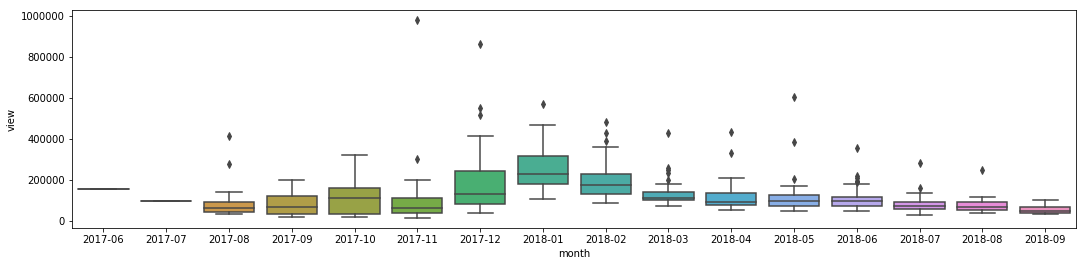

In [621]:
plt.figure(figsize=(18, 4))
sns.boxplot(bdf.month, bdf.view, order=sorted(bdf.month.unique()))

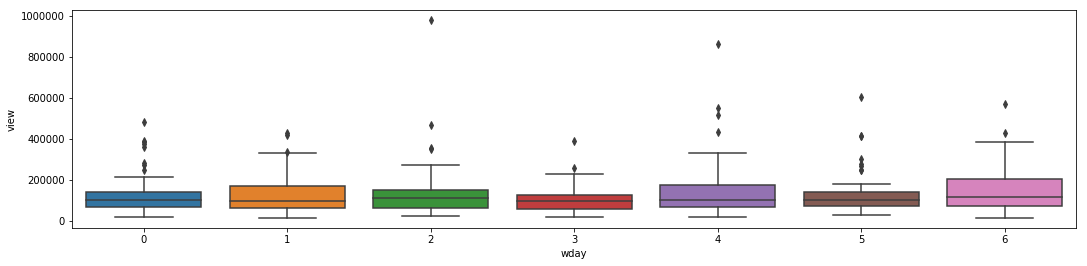

In [629]:
plt.figure(figsize=(18, 4))
sns.boxplot(bdf.wday, bdf.view, order=sorted(bdf.wday.unique()))

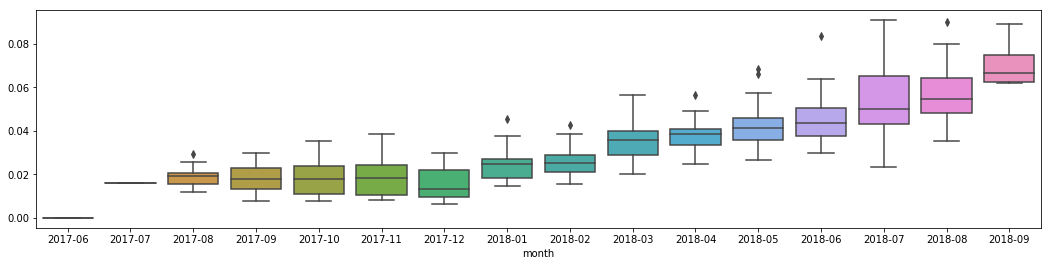

In [631]:
plt.figure(figsize=(18, 4))
sns.boxplot(bdf.month, bdf.like / bdf.view, order=sorted(bdf.month.unique()))

In [617]:
[x for x in list(bdf.title) if "万" in x]

['【㊗️50万人!!】ハーフミリオン達成・・・！お前もバーガーの具にしてやろうか！🍔【バーガーバーガー実況】',
 'チャンネル登録者数46万人突破！（重大告知）',
 '【㊗️46万人🌸】シロがやると言ったらこれしかない！！！🍔【バーガーバーガー実況】',
 '【㊗️40万人!!】あっちこっち壺おじ!【Getting over it】【176】',
 '【プリコネ】女子が1万円で60連ひいてみたら【おまけ付き】【154】',
 '【㊗️30万人🌸】シロ組感謝祭はーじまーるよーっ🎶',
 '【生放送/VR LIVE】30万人突破?!記念生放送',
 '【ドラクエライバルズ】【これは必見】女子なのに１０万円分（４４０連）突っ込んでみた結果。。。【DQR】']

In [649]:
z = s.tables[1]

In [655]:
z.round(3)

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
2017-06,-0.026,0.010,-2.663,0.008,-0.045,-0.007
2017-07,-0.010,0.010,-1.035,0.302,-0.029,0.009
2017-08,-0.011,0.002,-4.384,0.000,-0.015,-0.006
2017-09,-0.008,0.003,-2.996,0.003,-0.013,-0.003
2017-10,-0.011,0.002,-4.739,0.000,-0.015,-0.006
2017-11,-0.006,0.003,-2.534,0.012,-0.012,-0.001
2017-12,-0.011,0.003,-4.121,0.000,-0.016,-0.006
2018-01,-0.001,0.002,-0.552,0.581,-0.006,0.003
2018-02,0.000,0.002,0.004,0.997,-0.004,0.004
2018-03,0.007,0.002,3.260,0.001,0.003,0.011


In [648]:
z.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n      <th>2</th>\n      <th>3</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>Model:</td>\n      <td>OLS</td>\n      <td>Adj. R-squared:</td>\n      <td>0.749</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>Dependent Variable:</td>\n      <td>y</td>\n      <td>AIC:</td>\n      <td>-2484.6014</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>Date:</td>\n      <td>2018-09-05 12:57</td>\n      <td>BIC:</td>\n      <td>-1788.3740</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>No. Observations:</td>\n      <td>386</td>\n      <td>Log-Likelihood:</td>\n      <td>1418.3</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>Df Model:</td>\n      <td>175</td>\n      <td>F-statistic:</td>\n      <td>7.563</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>Df Residuals:</td>\n      <td>210</td>\n      <td